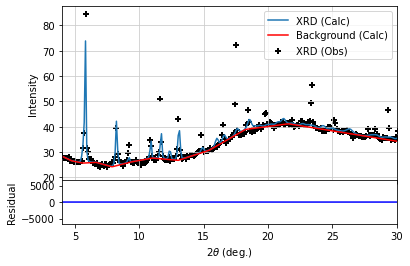

In [26]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/jyb/.conda/envs/yfh/GSASII')
from matplotlib.gridspec import GridSpec

def rietveld_plot():
    import GSASIIscriptable as G2sc

    gpx = G2sc.G2Project(
        '/home/jyb/yifanhou/examples/9/job_0@f1.cif/refine_trial_143.gpx')

    hist1 = gpx.histograms()[0]
    phase0 = gpx.phases()[0]
    
    hist = hist1
    i = 5
    two_theta = hist.getdata("X")[::i]
    Yobs = hist.getdata("Yobs")[::i]
    Ycalc = hist.getdata("Ycalc")[::i]
    bg = hist.getdata("Background")[::i]
    residual = hist.getdata("Residual")[::i]

    fig = plt.figure()
    gs = GridSpec(5, 1, figure=fig)
    ax1 = fig.add_subplot(gs[:4, :])
    ax2 = fig.add_subplot(gs[4, :])
    fig.subplots_adjust(hspace=0)
    ax1.grid(color='#cccccc')

    ax1.scatter(two_theta, Yobs, marker='P', lw=0.0001, c='Black', label='XRD (Obs)')
    ax1.plot(two_theta, Ycalc, label='XRD (Calc)')
    ax1.plot(two_theta, bg, color='red', label='Background (Calc)')
    ax1.set_ylabel('Intensity')
    ax1.legend()
    ax2.plot(two_theta, residual, color='blue')
    plt.setp(ax1.get_xticklabels(), visible=False);
    ax2.set_ylim(-6600, 6600)
    plt.xlabel(r'$2\theta$ (deg.)')
    ax2.set_ylabel('Residual')
    ax1.set_xlim(4,30)
    ax2.set_xlim(4,30)
    #plt.show()
    plt.savefig('9_job_0@f1.cif_6.75.png',dpi=600,bbox_inches='tight')
    
rietveld_plot()